sources

https://www.kaggle.com/code/quadeer15sh/classification-and-pokemon-api-90-f1-score

https://www.kaggle.com/code/quadeer15sh/tf-keras-cnn-99-accuracy

https://datascience.stackexchange.com/questions/79819/reason-why-there-is-two-dense-layer



In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [1]:
import numpy as np # linear algebra
import pandas as pd
import random
import tensorflow as tf
import keras
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os
import matplotlib.pyplot as plt

In [2]:
directory = "/Users/Mikef/OneDrive/Desktop/CPSC_393/PokemonData"
labels = os.listdir(directory)
nb = len(labels)
print(labels)

['Abra', 'Aerodactyl', 'Alakazam', 'Alolan Sandslash', 'Arbok', 'Arcanine', 'Articuno', 'Beedrill', 'Bellsprout', 'Blastoise', 'Bulbasaur', 'Butterfree', 'Caterpie', 'Chansey', 'Charizard', 'Charmander', 'Charmeleon', 'Clefable', 'Clefairy', 'Cloyster', 'Cubone', 'Dewgong', 'Diglett', 'Ditto', 'Dodrio', 'Doduo', 'Dragonair', 'Dragonite', 'Dratini', 'Drowzee', 'Dugtrio', 'Eevee', 'Ekans', 'Electabuzz', 'Electrode', 'Exeggcute', 'Exeggutor', 'Farfetchd', 'Fearow', 'Flareon', 'Gastly', 'Gengar', 'Geodude', 'Gloom', 'Golbat', 'Goldeen', 'Golduck', 'Golem', 'Graveler', 'Grimer', 'Growlithe', 'Gyarados', 'Haunter', 'Hitmonchan', 'Hitmonlee', 'Horsea', 'Hypno', 'Ivysaur', 'Jigglypuff', 'Jolteon', 'Jynx', 'Kabuto', 'Kabutops', 'Kadabra', 'Kakuna', 'Kangaskhan', 'Kingler', 'Koffing', 'Krabby', 'Lapras', 'Lickitung', 'Machamp', 'Machoke', 'Machop', 'Magikarp', 'Magmar', 'Magnemite', 'Magneton', 'Mankey', 'Marowak', 'Meowth', 'Metapod', 'Mew', 'Mewtwo', 'Moltres', 'MrMime', 'Muk', 'Nidoking', 'Ni

###Resize photos to 150x150

In [3]:
stored = {}
def input_target_split(train_dir,labels):
    dataset = []
    count = 0
    for label in labels:
        folder = os.path.join(train_dir,label)
        
        for image in os.listdir(folder):
#             print(os.path.join(folder,image))
            try:
                
                img=load_img(os.path.join(folder,image), target_size=(150,150))
                img=img_to_array(img)
                img=img/255.0
                dataset.append((img,count))
            except:
                pass

        print("Completed:",label)
        stored[label] = count
        count+=1
    
    random.shuffle(dataset)
    X, y = zip(*dataset)
    
    return np.array(X),np.array(y)

In [4]:
X, y = input_target_split(directory,labels)

Completed: Abra
Completed: Aerodactyl
Completed: Alakazam
Completed: Alolan Sandslash
Completed: Arbok
Completed: Arcanine
Completed: Articuno
Completed: Beedrill
Completed: Bellsprout
Completed: Blastoise
Completed: Bulbasaur
Completed: Butterfree
Completed: Caterpie
Completed: Chansey
Completed: Charizard
Completed: Charmander
Completed: Charmeleon
Completed: Clefable
Completed: Clefairy
Completed: Cloyster
Completed: Cubone
Completed: Dewgong
Completed: Diglett
Completed: Ditto
Completed: Dodrio
Completed: Doduo
Completed: Dragonair
Completed: Dragonite
Completed: Dratini
Completed: Drowzee
Completed: Dugtrio
Completed: Eevee
Completed: Ekans
Completed: Electabuzz
Completed: Electrode
Completed: Exeggcute
Completed: Exeggutor
Completed: Farfetchd
Completed: Fearow
Completed: Flareon
Completed: Gastly
Completed: Gengar
Completed: Geodude
Completed: Gloom
Completed: Golbat
Completed: Goldeen
Completed: Golduck
Completed: Golem
Completed: Graveler
Completed: Grimer
Completed: Growlithe

In [6]:
len(stored)

150

In [7]:
stored

{'Abra': 0,
 'Aerodactyl': 1,
 'Alakazam': 2,
 'Alolan Sandslash': 3,
 'Arbok': 4,
 'Arcanine': 5,
 'Articuno': 6,
 'Beedrill': 7,
 'Bellsprout': 8,
 'Blastoise': 9,
 'Bulbasaur': 10,
 'Butterfree': 11,
 'Caterpie': 12,
 'Chansey': 13,
 'Charizard': 14,
 'Charmander': 15,
 'Charmeleon': 16,
 'Clefable': 17,
 'Clefairy': 18,
 'Cloyster': 19,
 'Cubone': 20,
 'Dewgong': 21,
 'Diglett': 22,
 'Ditto': 23,
 'Dodrio': 24,
 'Doduo': 25,
 'Dragonair': 26,
 'Dragonite': 27,
 'Dratini': 28,
 'Drowzee': 29,
 'Dugtrio': 30,
 'Eevee': 31,
 'Ekans': 32,
 'Electabuzz': 33,
 'Electrode': 34,
 'Exeggcute': 35,
 'Exeggutor': 36,
 'Farfetchd': 37,
 'Fearow': 38,
 'Flareon': 39,
 'Gastly': 40,
 'Gengar': 41,
 'Geodude': 42,
 'Gloom': 43,
 'Golbat': 44,
 'Goldeen': 45,
 'Golduck': 46,
 'Golem': 47,
 'Graveler': 48,
 'Grimer': 49,
 'Growlithe': 50,
 'Gyarados': 51,
 'Haunter': 52,
 'Hitmonchan': 53,
 'Hitmonlee': 54,
 'Horsea': 55,
 'Hypno': 56,
 'Ivysaur': 57,
 'Jigglypuff': 58,
 'Jolteon': 59,
 'Jynx': 60,

###Plot some photos with true labels

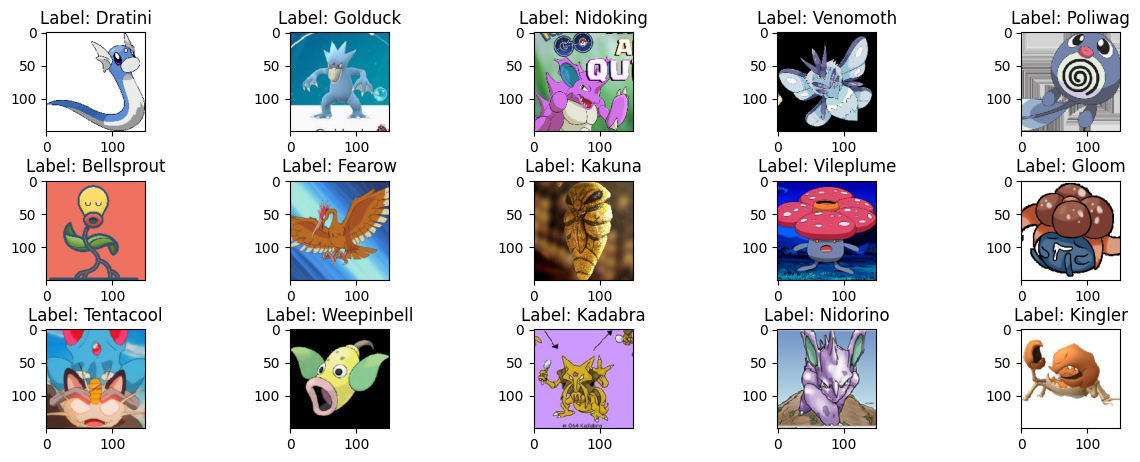

In [8]:


plt.figure(figsize = (15 , 9))
n = 0
for i in range(15):
    n+=1
    plt.subplot(5 , 5, n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.3)
    plt.imshow(X[i])
    plt.title(f'Label: {labels[y[i]]}')

In [5]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42)
#X_train, X_test = X_train / 255.0, X_test / 255.0
print(np.unique(y_train,return_counts=True),np.unique(y_test,return_counts=True))

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149]), array([26, 27, 19, 32, 32, 32, 36, 30, 33, 32, 29, 20, 30, 38, 30, 39, 40,
       27, 32, 40, 28, 29, 34, 31, 31, 30, 29, 40, 19, 32, 35, 28, 31, 31,
       42, 41

#Setting up and training the model

###Spacially Translating photos

In [10]:
datagen = ImageDataGenerator(horizontal_flip=True,
                             vertical_flip=True,
                             rotation_range=40,
                             zoom_range=0.2,
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             shear_range=0.2,
                             fill_mode="nearest")

testgen = ImageDataGenerator()

datagen.fit(X_train)
testgen.fit(X_test)


In [6]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

DONT RUN PAST THIS POINT (REMOVE LATER)

In [15]:
from tensorflow.keras.applications import DenseNet201

img_size = 150
base_model = DenseNet201(include_top = False,
                         weights = 'imagenet',
                         input_shape = (img_size,img_size,3))
#freeze the base model
base_model.trainable = False


In [16]:
#train model on top
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.2))
model.add(Dense(units=150, activation='softmax'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 4, 4, 1920)        18321984  
                                                                 
 global_average_pooling2d (G  (None, 1920)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1920)              0         
                                                                 
 dense (Dense)               (None, 150)               288150    
                                                                 
Total params: 18,610,134
Trainable params: 288,150
Non-trainable params: 18,321,984
_________________________________________________________________


In [5]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [22]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)

In [23]:
opt = Adam(learning_rate=0.001)
#compile model using accuracy to measure model performance
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
filepath= "model_pokemon.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', save_weights_only=False)

early_stopping = EarlyStopping(monitor='val_loss',min_delta = 0, patience = 5, verbose = 1, restore_best_weights=True)

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.2, 
                                            min_lr=0.00001)

callbacks_list = [
        checkpoint,
        early_stopping,
        learning_rate_reduction
    ]

In [25]:
#@jit(target_backend='cuda')
batchSize = 16 
hist = model.fit(datagen.flow(X_train,y_train,batch_size=batchSize), validation_data=testgen.flow(X_test,y_test,batchSize),steps_per_epoch= (X_train.shape[0] // batchSize), epochs = 50, callbacks=callbacks_list)
#steps_per_epoch= ((6837*.8)/1024),
#validation_steps = ((6837*.2)/1024),
# add callbacks=callbacks_list for early stopping maybe

Epoch 1/50
332/332 [==============================] - ETA: 0s - loss: 3.8436 - accuracy: 0.2299
Epoch 1: val_accuracy improved from -inf to 0.55260, saving model to model_pokemon.h5
332/332 [==============================] - 41s 92ms/step - loss: 3.8436 - accuracy: 0.2299 - val_loss: 1.9423 - val_accuracy: 0.5526 - lr: 0.0010
Epoch 2/50
332/332 [==============================] - ETA: 0s - loss: 1.8392 - accuracy: 0.5583
Epoch 2: val_accuracy improved from 0.55260 to 0.66511, saving model to model_pokemon.h5
332/332 [==============================] - 26s 79ms/step - loss: 1.8392 - accuracy: 0.5583 - val_loss: 1.3733 - val_accuracy: 0.6651 - lr: 0.0010
Epoch 3/50
332/332 [==============================] - ETA: 0s - loss: 1.3643 - accuracy: 0.6659
Epoch 3: val_accuracy improved from 0.66511 to 0.73635, saving model to model_pokemon.h5
332/332 [==============================] - 26s 79ms/step - loss: 1.3643 - accuracy: 0.6659 - val_loss: 1.1365 - val_accuracy: 0.7364 - lr: 0.0010
Epoch 4/50

47/47 - 5s - loss: 0.7280 - accuracy: 0.8262 - 5s/epoch - 108ms/step


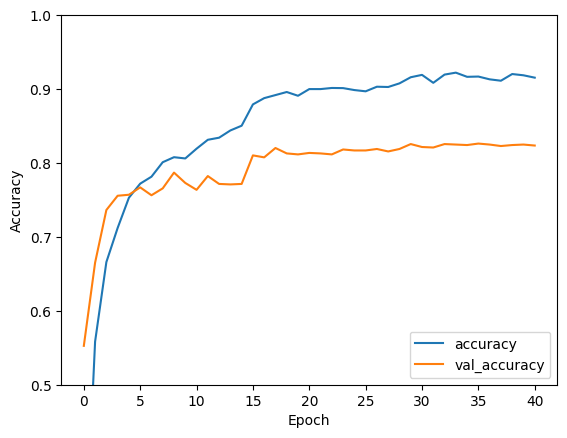

In [26]:
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

###Fine tune model

In [27]:
#unfreeze base model
base_model.trainable = True
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 4, 4, 1920)        18321984  
                                                                 
 global_average_pooling2d (G  (None, 1920)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1920)              0         
                                                                 
 dense (Dense)               (None, 150)               288150    
                                                                 
Total params: 18,610,134
Trainable params: 18,381,078
Non-trainable params: 229,056
_________________________________________________________________


In [28]:
opt = Adam(learning_rate=1e-5)
#compile model using accuracy to measure model performance
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
hist = model.fit(datagen.flow(X_train,y_train,batch_size=batchSize), validation_data=testgen.flow(X_test,y_test,batchSize),steps_per_epoch= (X_train.shape[0] // batchSize), epochs = 10)


Epoch 1/10
332/332 [==============================] - 63s 190ms/step - loss: 0.2553 - accuracy: 0.9233 - val_loss: 0.4784 - val_accuracy: 0.8728
Epoch 2/10
332/332 [==============================] - 61s 184ms/step - loss: 0.2242 - accuracy: 0.9310 - val_loss: 0.4615 - val_accuracy: 0.8722
Epoch 3/10
332/332 [==============================] - 55s 164ms/step - loss: 0.2015 - accuracy: 0.9397 - val_loss: 0.4509 - val_accuracy: 0.8828
Epoch 4/10
332/332 [==============================] - 54s 162ms/step - loss: 0.1781 - accuracy: 0.9495 - val_loss: 0.4505 - val_accuracy: 0.8848
Epoch 5/10
332/332 [==============================] - 54s 162ms/step - loss: 0.1748 - accuracy: 0.9454 - val_loss: 0.4382 - val_accuracy: 0.8875
Epoch 6/10
332/332 [==============================] - 54s 162ms/step - loss: 0.1442 - accuracy: 0.9576 - val_loss: 0.4239 - val_accuracy: 0.8915
Epoch 7/10
332/332 [==============================] - 54s 162ms/step - loss: 0.1189 - accuracy: 0.9659 - val_loss: 0.4082 - val_ac

47/47 - 3s - loss: 0.3913 - accuracy: 0.9008 - 3s/epoch - 61ms/step


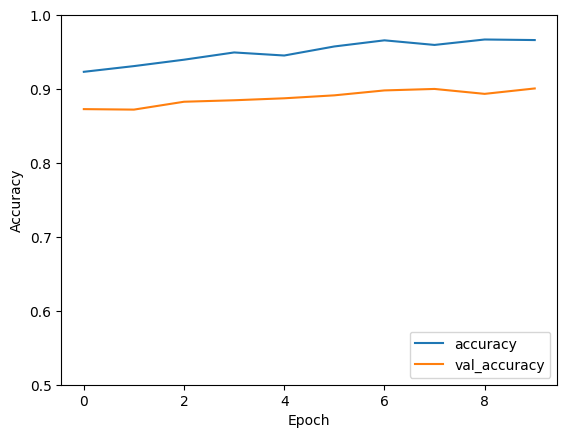

In [31]:
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [35]:
model.save("/Users/Mikef/OneDrive/Desktop/CPSC_393/")

INFO:tensorflow:Assets written to: /Users/Mikef/OneDrive/Desktop/CPSC_393/assets


INFO:tensorflow:Assets written to: /Users/Mikef/OneDrive/Desktop/CPSC_393/assets


In [36]:
print(test_acc)


0.9007989168167114


#Load model back in and run tests

In [4]:
model = keras.models.load_model('/Users/Mikef/OneDrive/Desktop/CPSC_393/')

In [13]:
y_pred = model.predict(X_test)
pred = np.argmax(y_pred,axis=1)
print(pred)

47/47 [==============================] - 3s 58ms/step
[ 82 117 119 ...  27  95 143]


In [14]:
ground = np.argmax(y_test,axis=1)

In [15]:
from sklearn.metrics import classification_report

print(classification_report(ground,pred,target_names = labels))

                  precision    recall  f1-score   support

            Abra       0.91      1.00      0.95        10
      Aerodactyl       1.00      0.90      0.95        10
        Alakazam       1.00      1.00      1.00         6
Alolan Sandslash       1.00      1.00      1.00        12
           Arbok       1.00      1.00      1.00        11
        Arcanine       1.00      1.00      1.00        14
        Articuno       1.00      1.00      1.00        12
        Beedrill       1.00      1.00      1.00         8
      Bellsprout       0.86      1.00      0.92         6
       Blastoise       1.00      1.00      1.00         7
       Bulbasaur       1.00      1.00      1.00         6
      Butterfree       1.00      1.00      1.00         7
        Caterpie       1.00      1.00      1.00         8
         Chansey       1.00      1.00      1.00         6
       Charizard       1.00      1.00      1.00         5
      Charmander       1.00      1.00      1.00        14
      Charmel

In [16]:
y_pred

array([[1.2772959e-08, 2.1885700e-09, 6.9678215e-13, ..., 1.3876703e-06,
        1.3712241e-09, 2.2296169e-09],
       [5.4596376e-09, 4.6162024e-12, 1.3731085e-11, ..., 1.2227673e-10,
        2.4047561e-11, 2.6583697e-09],
       [2.6986946e-09, 4.0183462e-08, 2.3226064e-06, ..., 2.4763230e-10,
        2.8391971e-06, 8.9547306e-08],
       ...,
       [3.0599207e-11, 1.8854887e-12, 4.2349934e-12, ..., 9.9112128e-11,
        1.0697436e-11, 5.2158291e-09],
       [1.0601187e-08, 1.9391002e-09, 4.6584295e-11, ..., 3.3707883e-14,
        9.9546101e-11, 6.1315539e-09],
       [2.2041162e-12, 2.0096420e-10, 8.9582069e-14, ..., 1.7906175e-09,
        6.9632749e-13, 2.6434163e-08]], dtype=float32)

In [17]:
y_pred = np.argmax(y_pred,axis=1)
y_pred

array([ 82, 117, 119, ...,  27,  95, 143], dtype=int64)

In [18]:
y_true = np.argmax(y_test,axis=1)
y_true

array([ 82, 117, 119, ...,  27,  95, 143], dtype=int64)

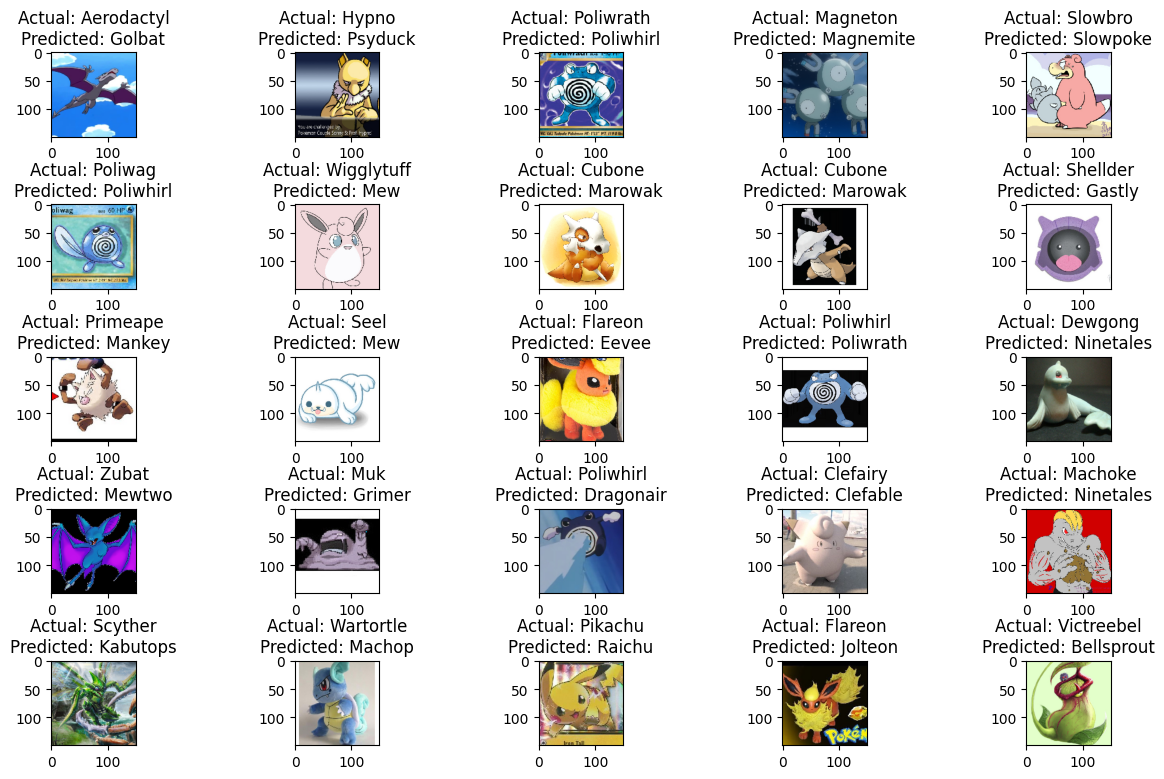

In [20]:
plt.figure(figsize = (15 , 9))
n = 0
for i in range(len(X_test)):
    if y_pred[i] != y_true[i]:
        n+=1
        if n <= 25:
            plt.subplot(5 , 5, n)
            plt.subplots_adjust(hspace = 0.8 , wspace = 0.3)
            plt.imshow(X_test[i])
            plt.title(f'Actual: {labels[y_true[i]]}\nPredicted: {labels[y_pred[i]]}')

add in individual tests like future evolutions, megas, and alternate forms to see how the model reacts

In [7]:
import cv2
from pathlib import Path


In [8]:
model = keras.models.load_model('/Users/Mikef/OneDrive/Desktop/CPSC_393/')

In [9]:
def predict_pictures(directory):
    directory_quiz = directory
    labels_quiz =[]
    for label in os.listdir(directory_quiz):
        labels_quiz.append(Path(os.path.join(directory_quiz,label)).stem)
    nb_quiz = len(labels)
    print(labels_quiz)
    dataset_quiz = []
    count = 0
    img_list = []
    label_list = []
    for image in os.listdir(directory_quiz):
        print(image)
        img = cv2.imread( os.path.join(directory_quiz,image))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (150, 150))
        img=img/255.0
        img = np.expand_dims(img, axis=0)
        img_list.append(img)
        pred = model.predict(img)
        label = np.argmax(pred,axis=1)
        label_list.append(label)
    plt.figure(figsize = (15 , 9))
    n = 0
    i = 0
    for i in range(len(labels_quiz)):
        n+=1
        if n <= 25:
            plt.subplot(5 , 5, n)
            plt.subplots_adjust(hspace = 0.8 , wspace = 0.3)
            plt.imshow(img_list[i][0])
            plt.title(f'Actual: {labels_quiz[i]}\nPredicted: {labels[label_list[i][0]]}')

['chansey', 'charizard', 'clefairy', 'geodude', 'pikachu', 'Victreebel']
chansey.jpg
1/1 [==============================] - 0s 51ms/step
charizard.jpeg
1/1 [==============================] - 0s 48ms/step
clefairy.jpg
1/1 [==============================] - 0s 51ms/step
geodude.jpeg
1/1 [==============================] - 0s 50ms/step
pikachu.jpeg
1/1 [==============================] - 0s 52ms/step
Victreebel.jpg
1/1 [==============================] - 0s 49ms/step


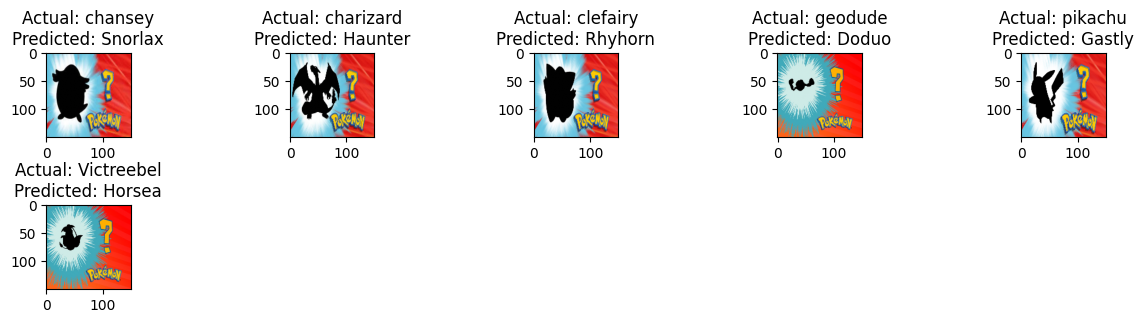

In [27]:

predict_pictures("/Users/Mikef/OneDrive/Desktop/CPSC_393/PokemonQuiz")

['charmander', 'oddish', 'pikachu', 'Poliwhirl', 'squirdle']
charmander.jpg
1/1 [==============================] - 0s 51ms/step
oddish.png
1/1 [==============================] - 0s 49ms/step
pikachu.png
1/1 [==============================] - 0s 49ms/step
Poliwhirl.png
1/1 [==============================] - 0s 50ms/step
squirdle.jpg
1/1 [==============================] - 0s 52ms/step


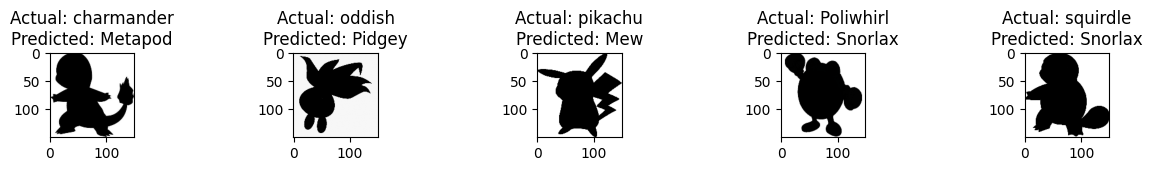

In [28]:
predict_pictures("/Users/Mikef/OneDrive/Desktop/CPSC_393/PokemonSilhouettes")

['Alolan_Raichu', 'Blissey', 'Cleffa', 'Crobat', 'Electivire', 'Igglybuff', 'Kingdra', 'Magby', 'Magmortar', 'Pichu', 'Porygon2', 'Scizor', 'Shiny_Charizard', 'Slowking', 'Steelix']
Alolan_Raichu.png
1/1 [==============================] - 6s 6s/step
Blissey.png
1/1 [==============================] - 0s 55ms/step
Cleffa.png
1/1 [==============================] - 0s 57ms/step
Crobat.png
1/1 [==============================] - 0s 52ms/step
Electivire.png
1/1 [==============================] - 0s 53ms/step
Igglybuff.jpeg
1/1 [==============================] - 0s 51ms/step
Kingdra.jpeg
1/1 [==============================] - 0s 52ms/step
Magby.jpeg
1/1 [==============================] - 0s 55ms/step
Magmortar.png
1/1 [==============================] - 0s 51ms/step
Pichu.png
1/1 [==============================] - 0s 51ms/step
Porygon2.png
1/1 [==============================] - 0s 56ms/step
Scizor.png
1/1 [==============================] - 0s 51ms/step
Shiny_Charizard.png
1/1 [=================

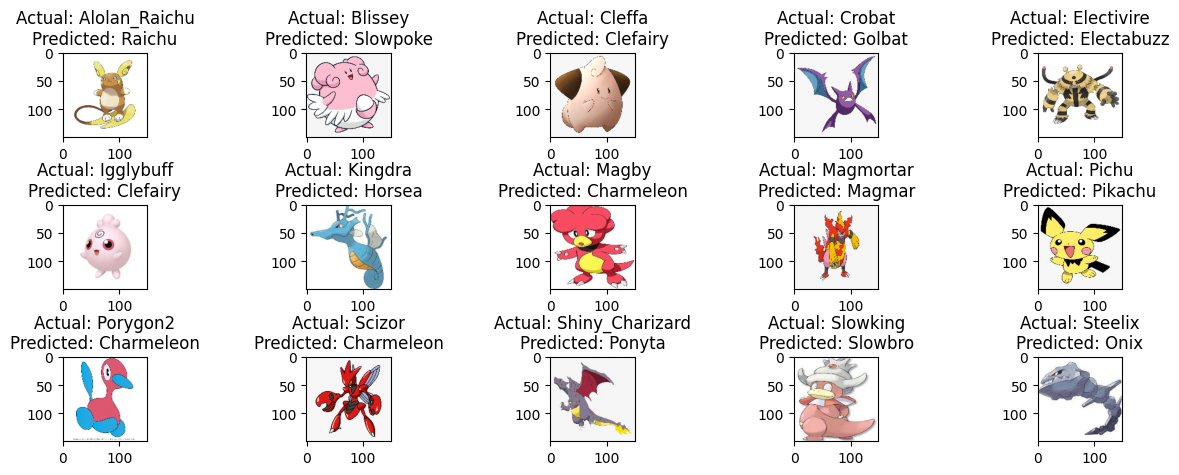

In [10]:
predict_pictures("/Users/Mikef/OneDrive/Desktop/CPSC_393/PokemonAltForms")